In [2]:
cd ../../../../E_drive/Dataset/Data-VPD-github1/data/Video/

[Errno 2] No such file or directory: '../../../../E_drive/Dataset/Data-VPD-github1/data/Video/'
/data/E_drive/Dataset/Data-VPD-github1/data/Video


In [3]:
import os
import matplotlib.pyplot as plt
os.getcwd()

'/data/E_drive/Dataset/Data-VPD-github1/data/Video'

In [4]:
import numpy as np
import cv2
from numba import jit, cuda

In [5]:
face_cascade = cv2.CascadeClassifier('../../../opencv-master/data/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('../../../opencv-master/data/haarcascades/haarcascade_eye.xml')

In [6]:
a =[]
a.append(2)
a.append(5)
a
import glob

In [7]:
from numba import jit

class vidproc:
    def __init__(self, cap =[], sav_opt = 0, filename=[]):
        self.pixval1 = []
        self.cap = cap
        self.fps = cap.get(cv2.CAP_PROP_FPS)
        self.sav_opt =  sav_opt
        self.filename =  filename
    
    @jit
    def run_vid(self):
        pixVal = []
        pixVal2 = []
        cropmn = []
        loop_t = 0
        while(self.cap.isOpened()):
            ret, frame = self.cap.read() 

            if ret ==0:
                break
            # converting BGR to HSV 

            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

            faces = face_cascade.detectMultiScale(
                    gray,
                    scaleFactor=1.1,
                    minNeighbors=5,
                    minSize = (30,30),
                    flags = cv2.CASCADE_SCALE_IMAGE
                    )

            cropIm = frame[600:700, 700:750]
            cropmn.append(cropIm.mean())

            #eyes = eye_cascade.detectMultiScale(gray, 1.1,3)

            #for f in faces:
                #x, y, w, h = [ v for v in f ]
               # cv2.rectangle(frame, (x,y), (x+w,y+h), (255,255,255))

                #sub_face = frame[y-50:y+h+50, x:x+w]
                #
                #sub_face = frame[180:750, 750:1170]
                
                #sub_face = cv2.resize(sub_face, (600,700))
                
                #[a,b,c,d] = [30, 50, 550, 240]
                
                #cv2.rectangle(sub_face, (a,b), (c, d), (255,255,255))
                
                #chickimg = sub_face[b:d, a:c]
                
                #chickimg =  cv2.resize(chickimg, (200, 200))
                
            
            sub_face = frame[200:800, 670:1050]
                
            sub_face = cv2.resize(sub_face, (600,700))
                
            [a,b,c,d] = [380, 350, 580, 550]
                
            cv2.rectangle(sub_face, (a,b), (c, d), (255,255,255))
                
            chickimg = sub_face[b:d, a:c]
                
            chickimg =  cv2.resize(chickimg, (200, 200))
            
            
            # Display the resulting frame
        
            self.pixval1.append(chickimg)
            
            
            cv2.imshow('Video', sub_face)           
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
              
            
            loop_t = +1

        pixd = {'p1': pixVal, 'p2': pixVal2, 'cpm' : cropmn}
        self.pixval1 = np.array(self.pixval1)
        
        if self.sav_opt: 
            self.vidwrit(i2s =  self.pixval1) 
        
        return pixd, self.pixval1
    
    
    def vidwrit(self, i2s=[]):
        
        out = cv2.VideoWriter('TrainPrep/RCheek/' + self.filename ,cv2.VideoWriter_fourcc(*'DIVX'), 
                              self.fps, (200, 200))
        for i in range(len(i2s)):
            out.write(i2s[i])
        out.release()

In [8]:
vidname = 'p15_physical.MP4'
cap = cv2.VideoCapture(vidname)
    # Check if camera opened successfully
videop =  vidproc(cap = cap, sav_opt = 0, filename = vidname)
pixVal, pv1 = videop.run_vid()

cap.release()
cv2.destroyAllWindows()

pv1 = np.array(pv1)

<ipython-input-7-76a373ef29f1>:11: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "run_vid" failed type inference due to: Untyped global name 'face_cascade': cannot determine Numba type of <class 'cv2.CascadeClassifier'>

File "<ipython-input-7-76a373ef29f1>", line 26:
    def run_vid(self):
        <source elided>

            faces = face_cascade.detectMultiScale(
            ^

  @jit
<ipython-input-7-76a373ef29f1>:11: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "run_vid" failed type inference due to: cannot determine Numba type of <class 'numba.dispatcher.LiftedLoop'>

File "<ipython-input-7-76a373ef29f1>", line 17:
    def run_vid(self):
        <source elided>
        loop_t = 0
        while(self.cap.isOpened()):
        ^

  @jit
/home/zahid/anaconda3/envs/work_env/lib/python3.7/site-packages/numba/object_mode_passes.py:178: NumbaWarning: Function "run_vid" was compil

In [9]:
vidname = 'p1_physical.MP4'
'TrainPrep/LCheek/'+vidname

'TrainPrep/LCheek/p1_physical.MP4'

In [10]:
out = cv2.VideoWriter('TrainPrep/LCheek/p13vong_normal.avi',cv2.VideoWriter_fourcc(*'DIVX'), 25.0, (200, 200))
for i in range(len(pv1)):
    out.write(pv1[i])
out.release()

In [11]:
#videop.vidwrit(pv1)

In [12]:
cap = cv2.VideoCapture('p13_normal.MP4')
fps = cap.get(cv2.CAP_PROP_FPS)
cap.release()
print(fps)

25.0


In [13]:

plt.plot(pixVal1['cpm']), plt.xlabel("Time"), plt.ylabel("Magnitude"), plt.title("Original signal")

NameError: name 'pixVal1' is not defined

In [14]:
bb= np.array( pixVal1['cpm'])

#bb= np.reshape(bb, [-1,1])

bb.shape

NameError: name 'pixVal1' is not defined

In [15]:
import scipy
from scipy.fftpack import fft 

yf = scipy.fftpack.fft(bb) 
 
xf =  np.linspace(0,12.5, 500)
plt.plot(np.abs(yf[20:200]))


## Get frequencies corresponding to signal PSD 

NameError: name 'bb' is not defined

In [16]:
freq = np.fft.fftfreq(bb.size, d=1/25)
val = np.abs(freq)<.8

yf[val] = 0

val = np.abs(freq)>4

yf[val] = 0


plt.plot(freq, np.abs(yf)), plt.xlabel("Frequency"), plt.ylabel("Magnitude"), plt.title("Filtered frequency")

resig = scipy.fftpack.ifft(yf)
plt.figure()
plt.plot(resig), plt.xlabel("Time"), plt.ylabel("Magnitude"),  plt.title("Reconstructed")

NameError: name 'bb' is not defined

In [17]:
pwd

'/data/E_drive/Dataset/Data-VPD-github1/data/Video'

In [18]:
file= open("../ECG/p15_physical.txt","rt")
text = file.read()
file.close()

val = text.split()

len(val)
val[520]

'-97'

dict

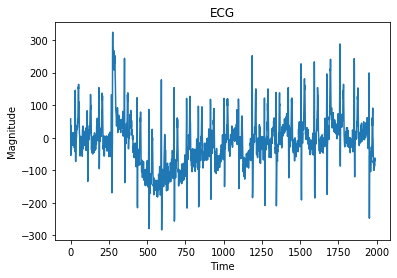

In [19]:
# Reading ECG signal form the text file 
EcgS = {}

for i,j in zip(['#I[uV]','#II[uV]', '#III[uV]', '#avR[uV]', '#avL[uV]'],['#II[uV]', '#III[uV]', '#avR[uV]', '#avL[uV]','#avF[uV]']):
    resf = np.array( [ _ for _ in range(len(val)) if val[_] == i])
    rese = np.array( [_ for _ in range(len(val)) if val[_] == j])
    EcgS[i] =  np.array(val[resf[0]+1: rese[0]]).astype(float)

EcgS[j] = np.array(val[rese[0]+1:]).astype(float)

#plt.plot(val2)
plt.plot(EcgS['#I[uV]'][8:]), plt.xlabel("Time"), plt.ylabel("Magnitude"),  plt.title("ECG")

type(EcgS)

In [20]:
type(EcgS)

dict

In [21]:
from scipy.io import loadmat
x=loadmat('../../../Merl_Tim/Subject1_still/PulseOX/pulseOx.mat')

In [22]:
x.keys()

dict_keys(['__header__', '__version__', '__globals__', 'pulseOxRecord', 'pulseOxTime', 'numPulseSample'])

In [23]:
x['__globals__']

[]

In [24]:
pulseoxR = np.squeeze(x['pulseOxRecord'])
pulseoxT = x['pulseOxTime']

In [25]:

pulT = []
pulseoxR.shape[1]

IndexError: tuple index out of range

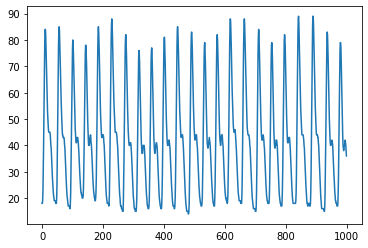

In [26]:
pulR = []
for i in range(pulseoxR.shape[0]):
    pulR.append(pulseoxR[i][0][0])

plt.plot(np.array(pulR[7000:8000]))

pulR = np.array(pulR)

In [27]:
plt.plot(pul[1000:2000])

NameError: name 'pul' is not defined

In [28]:
cd ../../../Merl_Tim/Subject1_still

/data/E_drive/Dataset/Merl_Tim/Subject1_still


In [29]:
ls

IR/  PulseOX/  RGB_demosaiced/  RGB_raw/


In [30]:
img1= cv2.imread("IR/Frame00000.pgm")
iD_ir = "IR"
iD_rgb = "RGB_demosaiced"
dataPath =  os.path.join(iD_ir, '*.pgm')
files = glob.glob(dataPath)

In [31]:
data = []

for f1 in files:
    img = cv2.resize(cv2.imread(f1)[:,:,1], (50,50))
    img = img[:,:, np.newaxis]
    data.append(img)

In [32]:
data = np.array(data)

In [33]:
print(data.shape)
print(pulR.shape)
10703//2

(5386, 50, 50, 1)
(10703,)


5351

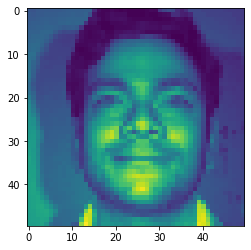

In [249]:
trX1 = np.reshape(data[25:65,:,:,0], [40,50,50])
trX1 = np.moveaxis(trX1, 0,-1)

plt.imshow(trX1[:,:,0])



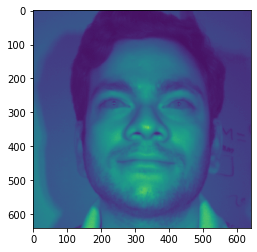

In [36]:
gc =cv2.imread(files[0])[:,:,1]
gc = gc[:,:,np.newaxis]
gc.shape
plt.imshow(gc[:,:,0])

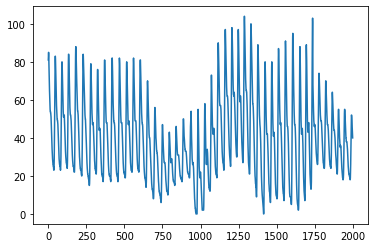

In [37]:
pulR.shape
plt.plot(pulR[0:2000])

In [229]:
import random
from random import seed, randint
random.seed(1)

In [250]:
rv = [randint(0,5300) for _ in range(10000)]
randint(0,5350)
rv =  np.array(rv)
pulR = np.reshape(pulR, [10703,1])

In [251]:
trainX = []
#trainY = np.zeros([200,80])
trainY = []


for j,i in enumerate(rv):
    img = np.reshape(data[i:i+40,:,:,0], [40,50,50])
    img = np.moveaxis(img, 0,-1)
    trainX.append(img)
    ppg = pulR[2*i: 2*i+80,0]
    trainY.append(ppg)


trainX = np.array(trainX, dtype = np.float32)/255.0
trainY = np.array(trainY, dtype = np.float32)

In [252]:
trainX.shape

(10000, 50, 50, 40)

In [297]:
num_classes = 80 # total classes (0-9 digits).
num_features = 50*50*40 # data features (img shape: 28*28).

# Training parameters.
learning_rate = 0.01
training_steps = 40000
batch_size = 16
display_step = 50

# Network parameters.
n_hidden_1 = 128 # 1st layer number of neurons.
n_hidden_2 = 256 # 2nd layer number of neurons.

In [319]:
from tensorflow.keras import Model, layers
import tensorflow as tf
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'


class ConvNet(Model):
    # Set layers.
    def __init__(self):
        super(ConvNet, self).__init__()
        # Convolution Layer with 32 filters and a kernel size of 5.
        self.conv1 = layers.Conv2D(64, kernel_size=3, activation=tf.nn.relu)
        # Max Pooling (down-sampling) with kernel size of 2 and strides of 2. 
        self.maxpool1 = layers.MaxPool2D(2, strides=2)

        # Convolution Layer with 64 filters and a kernel size of 3.
        self.conv2 = layers.Conv2D(64, kernel_size=3, activation=tf.nn.relu)
        # Max Pooling (down-sampling) with kernel size of 2 and strides of 2. 
        self.maxpool2 = layers.MaxPool2D(2, strides=2)

        # Flatten the data to a 1-D vector for the fully connected layer.
        self.flatten = layers.Flatten()

        # Fully connected layer.
        self.fc1 = layers.Dense(1024)
        # Apply Dropout (if is_training is False, dropout is not applied).
        self.dropout = layers.Dropout(rate=0.5)
        
        self.fc2 = layers.Dense(1024)
        # Apply Dropout (if is_training is False, dropout is not applied).
        self.dropout1 = layers.Dropout(rate=0.5)

        # Output layer, class prediction.
        self.out = layers.Dense(num_classes)

    # Set forward pass.
    def call(self, x, is_training=False):
        x = tf.reshape(x, [-1, 50, 50, 40])
        x = self.conv1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.maxpool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.dropout(x, training=is_training)
        x = self.fc2(x)
        x = self.dropout1(x, training=is_training)
        x = self.out(x)

        return x


In [320]:
type(trainY[0,0])

numpy.float32

In [321]:
from sklearn.model_selection import train_test_split

In [322]:
trX, teX, trY, teY = train_test_split(trainX , trainY, test_size = .1, random_state = 42)

In [337]:
trY =  trY/trY.max()

In [338]:
train_data = tf.data.Dataset.from_tensor_slices((trX, trY))
train_data = train_data.repeat().shuffle(1).batch(batch_size).prefetch(1)

In [339]:
def RootMeanSquareLoss(x,y):
    y = tf.cast(y, tf.float32)
    loss = tf.keras.losses.MSE(y_true = y, y_pred =x)
    return tf.reduce_mean(loss) 

In [340]:
x = tf.Variable([[1.0,2.0],[2.0,3.0],[2.0,2]])
y = tf.Variable([[1.0,2.0],[2.0,0.0],[2.0,2.0]])
RootMeanSquareLoss(x,y)

<tf.Tensor: shape=(), dtype=float32, numpy=1.5>

In [341]:
optimizer = tf.optimizers.SGD(learning_rate)

In [342]:
def run_optimization(neural_net, x,y):    
    with tf.GradientTape() as g:
        pred =  neural_net(x, is_training = True)
        loss =  RootMeanSquareLoss(pred, y)
        
    trainable_variables =  neural_net.trainable_variables
    
    gradients =  g.gradient(loss, trainable_variables)
    
    optimizer.apply_gradients(zip(gradients, trainable_variables))

In [343]:
def train_nn(neural_net, train_data):
        
    for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):     
        run_optimization(neural_net, batch_x, batch_y)

        if step % display_step == 0:
            pred = neural_net(batch_x, is_training=True)
            loss = RootMeanSquareLoss(pred, batch_y)
            print("step: %i, loss: %f" % (step, loss))

In [344]:
neural_net = ConvNet()
inarg = (neural_net, train_data)
train_nn(*inarg)

step: 50, loss: 0.085012
step: 100, loss: 0.080802
step: 150, loss: 0.064379
step: 200, loss: 0.064095
step: 250, loss: 0.066781
step: 300, loss: 0.064764
step: 350, loss: 0.056113
step: 400, loss: 0.053170
step: 450, loss: 0.057308
step: 500, loss: 0.051357
step: 550, loss: 0.061178
step: 600, loss: 0.057759
step: 650, loss: 0.057869
step: 700, loss: 0.048435
step: 750, loss: 0.051150
step: 800, loss: 0.057431
step: 850, loss: 0.053405
step: 900, loss: 0.053057
step: 950, loss: 0.052023
step: 1000, loss: 0.053816
step: 1050, loss: 0.056043
step: 1100, loss: 0.045591
step: 1150, loss: 0.052048
step: 1200, loss: 0.049714
step: 1250, loss: 0.051641
step: 1300, loss: 0.049006
step: 1350, loss: 0.047631
step: 1400, loss: 0.049526
step: 1450, loss: 0.047508
step: 1500, loss: 0.048970
step: 1550, loss: 0.046983
step: 1600, loss: 0.053624
step: 1650, loss: 0.053401
step: 1700, loss: 0.040421
step: 1750, loss: 0.046883
step: 1800, loss: 0.045918
step: 1850, loss: 0.052807
step: 1900, loss: 0.0

step: 15100, loss: 0.042212
step: 15150, loss: 0.039464
step: 15200, loss: 0.032088
step: 15250, loss: 0.039014
step: 15300, loss: 0.037111
step: 15350, loss: 0.045560
step: 15400, loss: 0.038234
step: 15450, loss: 0.039838
step: 15500, loss: 0.041444
step: 15550, loss: 0.038089
step: 15600, loss: 0.038860
step: 15650, loss: 0.038603
step: 15700, loss: 0.036895
step: 15750, loss: 0.042310
step: 15800, loss: 0.036979
step: 15850, loss: 0.037600
step: 15900, loss: 0.040544
step: 15950, loss: 0.036894
step: 16000, loss: 0.041643
step: 16050, loss: 0.041070
step: 16100, loss: 0.035817
step: 16150, loss: 0.035215
step: 16200, loss: 0.034894
step: 16250, loss: 0.033213
step: 16300, loss: 0.041853
step: 16350, loss: 0.040726
step: 16400, loss: 0.040368
step: 16450, loss: 0.034500
step: 16500, loss: 0.037424
step: 16550, loss: 0.043674
step: 16600, loss: 0.040942
step: 16650, loss: 0.039863
step: 16700, loss: 0.039056
step: 16750, loss: 0.039898
step: 16800, loss: 0.043059
step: 16850, loss: 0

step: 29750, loss: 0.032638
step: 29800, loss: 0.039577
step: 29850, loss: 0.038612
step: 29900, loss: 0.039256
step: 29950, loss: 0.033989
step: 30000, loss: 0.035841
step: 30050, loss: 0.043194
step: 30100, loss: 0.040791
step: 30150, loss: 0.039119
step: 30200, loss: 0.038603
step: 30250, loss: 0.037985
step: 30300, loss: 0.041489
step: 30350, loss: 0.034768
step: 30400, loss: 0.039165
step: 30450, loss: 0.040572
step: 30500, loss: 0.040704
step: 30550, loss: 0.036973
step: 30600, loss: 0.035217
step: 30650, loss: 0.037432
step: 30700, loss: 0.036267
step: 30750, loss: 0.036704
step: 30800, loss: 0.035390
step: 30850, loss: 0.040750
step: 30900, loss: 0.039304
step: 30950, loss: 0.032550
step: 31000, loss: 0.037290
step: 31050, loss: 0.036572
step: 31100, loss: 0.043292
step: 31150, loss: 0.038687
step: 31200, loss: 0.039168
step: 31250, loss: 0.040625
step: 31300, loss: 0.036275
step: 31350, loss: 0.037190
step: 31400, loss: 0.037494
step: 31450, loss: 0.037866
step: 31500, loss: 0

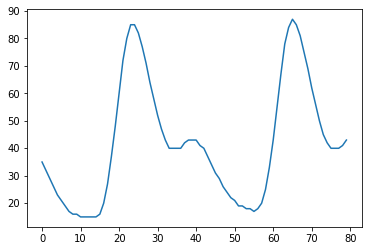

In [314]:
i = 5000 
trX1 = np.reshape(data[i:i+40,:,:,0], [40,50,50])
trX1 = np.moveaxis(trX1, 0,-1)

gt = pulR[i*2:i*2+80]
plt.plot(gt)

trX1 = trX1/255.0

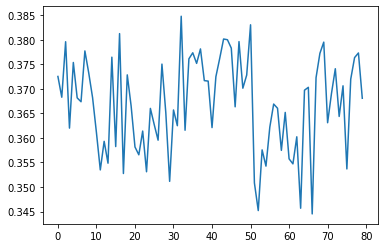

In [315]:
predd = neural_net(trX1) 
plt.plot(predd[0])

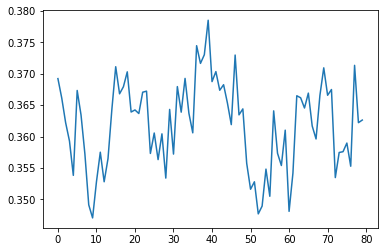

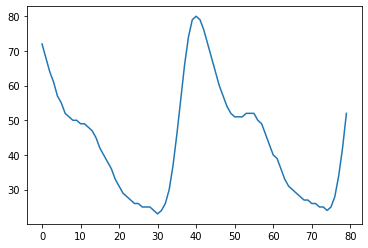